In [47]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [48]:
df = pd.read_excel('test_data.xlsx')

In [49]:
df

,Unnamed: 0,name,title,time,year_of_birth,description,link,text,sentiment?,names_list,name_matching_score,nationality_matching_score,gender_matching_score,age_matching_score,ground_confidence
0,0,Chia Teck Leng,Guilty As Charged: Chia Teck Leng led a double...,64 months ago,56,Asia Pacific Breweries executive Chia Teck Len...,https://www.straitstimes.com/singapore/courts-...,This story was first published in July 2015 in...,"{'neg': 0.453, 'neu': 0.495, 'pos': 0.052, 'co...","Counter({'Chia': 10, 'Chia Teck Leng': 4, 'Li ...",100,1.0,0.901961,0,1
1,3,Chia Teck Leng,Guilty As Charged: Shocking crimes that have s...,64 months ago,56,Chia Teck Leng secretly led a double life as a...,https://www.straitstimes.com/singapore/courts-...,The following stories were first published in ...,"{'neg': 0.47, 'neu': 0.498, 'pos': 0.031, 'com...","Counter({'Chia Teck Leng': 3, 'Weng Wah': 3, '...",100,1.0,0.400000,0,1
2,6,Chia Teck Leng,Accountant who embezzled $40m a compulsive gam...,27 months ago,59,While Ewe did not amass riches from his crimes...,https://www.straitstimes.com/singapore/courts-...,SINGAPORE - Certified public accountant Ewe Pa...,"{'neg': 0.322, 'neu': 0.648, 'pos': 0.03, 'com...","Counter({'Ewe': 3, 'Chia Teck Leng': 2, 'Khoo'...",100,1.0,0.000000,0,1
3,9,Chia Teck Leng,John Soh could face longest-ever jail term for...,54 months ago,57,"SINGAPORE (March 3): Chia Teck Leng, a former ...",https://www.theedgemarkets.com/article/john-so...,"SINGAPORE (March 3): Chia Teck Leng, a former ...","{'neg': 0.519, 'neu': 0.464, 'pos': 0.017, 'co...","Counter({'Soh': 5, 'Chia': 3, 'Chia Teck Leng'...",100,1.0,0.000000,0,1
4,12,Chia Teck Leng,"Sherlock Holmes of Shenton Way, Brunch - THE B...",38 months ago,58,PwC forensics leader Chan Kheng Tek adds that ...,https://www.businesstimes.com.sg/brunch/sherlo...,NaN,"{'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound...","Counter({'Chan Kheng': 1, 'Chia Teck Leng': 1})",100,0.0,0.000000,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,12,Tay Sheng Yang,Orchard Towers murder: Man who threw away bloo...,8 months ago,0,... to that of consorting with 29-year-old Tan...,https://www.straitstimes.com/singapore/courts-...,SINGAPORE - A 27-year-old man linked to the 20...,"{'neg': 0.569, 'neu': 0.414, 'pos': 0.018, 'co...","Counter({'Tan': 8, 'Loo': 6, 'Tan Seng Yang': ...",89,1.0,0.000000,1,0
89,0,SAHIN Huseyin,Mum stabbed to death by her husband AND her ex...,11 months ago,63,"Edanur Sahin, 24, was stabbed a total of 13 ti...",https://www.thesun.co.uk/news/12861810/mum-sta...,A YOUNG mum was stabbed to death by both her h...,"{'neg': 0.363, 'neu': 0.599, 'pos': 0.038, 'co...","Counter({'Huseyin Sahin': 4, 'Edanur': 3, 'Eda...",100,0.0,0.000000,0,1
90,0,NaN,UK Government has ordered to freeze assets of ...,11 months ago,0,"... Mohammad, Jibril (4) ARDHAN, Muhamad, Rick...",https://finchannel.com/uk-government-has-order...,NaN,"{'neg': 0.124, 'neu': 0.861, 'pos': 0.015, 'co...","Counter({'Muhammad': 37, 'Abdul': 20, 'Abd': 1...",100,0.0,0.000000,0,1
91,3,NaN,What an 'October surprise' from North Korea mi...,11 months ago,0,... in accordance with Policing and Crime Act ...,https://finchannel.com/what-an-october-surpris...,"The FINANCIAL — On January 1, North Korea’s ru...","{'neg': 0.067, 'neu': 0.813, 'pos': 0.121, 'co...","Counter({'Kim': 13, 'Kim Jong Un': 3, 'Ricky':...",100,0.0,0.000000,1,1


In [50]:
df = df[['name_matching_score','nationality_matching_score','gender_matching_score','age_matching_score','ground_confidence']]

In [51]:
df[(df['gender_matching_score'] == 1) & (df['ground_confidence'] == 0)]

,name_matching_score,nationality_matching_score,gender_matching_score,age_matching_score,ground_confidence


In [52]:
feature_cols = ['name_matching_score','nationality_matching_score','gender_matching_score','age_matching_score']
X = df[feature_cols]

y = df.ground_confidence

In [53]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=555)

In [54]:
logreg = LogisticRegression()

logreg.fit(X_train,y_train)

y_pred=logreg.predict(X_test)

In [55]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[ 0,  3],
       [ 0, 21]], dtype=int64)

In [56]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 257.44, 'Predicted label')

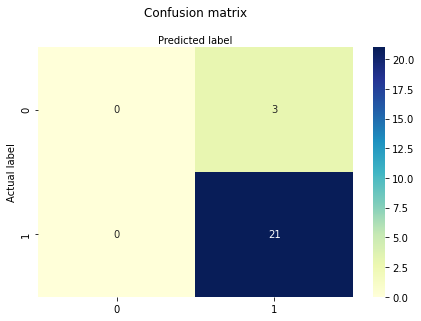

In [57]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [58]:
logreg

LogisticRegression()

In [59]:
import statsmodels.api as sm
from statsmodels.tools import add_constant
X = add_constant(X)
logit_model=sm.Logit(y,X)
result=logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.282616
         Iterations 8


In [60]:
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:      ground_confidence   No. Observations:                   93
Model:                          Logit   Df Residuals:                       88
Method:                           MLE   Df Model:                            4
Date:                Sat, 02 Oct 2021   Pseudo R-squ.:                  0.1111
Time:                        11:11:46   Log-Likelihood:                -26.283
converged:                       True   LL-Null:                       -29.568
Covariance Type:            nonrobust   LLR p-value:                    0.1605
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                        -11.5186     12.475     -0.923      0.356     -35.968      12.931
name_matching_score            0.1334      0.126      1.059      0.290      -0.113 

## Can see here that the p value at 5% confidence level, nationality, gender, age are not statistically significant.

In [61]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()

linreg.fit(X_train,y_train)

y_pred=linreg.predict(X_test)

In [62]:
print(linreg.coef_)

[ 0.0402178   0.05996704  0.07762987 -0.09123027]


In [63]:
from sklearn.ensemble import RandomForestRegressor

In [64]:
rf = RandomForestRegressor(random_state = 4)

In [65]:
rfmodel = rf.fit(X_train,y_train)

In [66]:
y_pred_r = rfmodel.predict(X_test)

In [67]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

## MSE for random forest

In [68]:
mae_r = mean_absolute_error(y_test,y_pred_r)
mse_r = mean_squared_error(y_test,y_pred_r)
print(f"MAE: {mae_r}, MSE: {mse_r}")

MAE: 0.15279960596688205, MSE: 0.12262414470587478


## MSE for linear regression

In [69]:
mae_r = mean_absolute_error(y_test,y_pred)
mse_r = mean_squared_error(y_test,y_pred)
print(f"MAE: {mae_r}, MSE: {mse_r}")

MAE: 0.1868075781244006, MSE: 0.1220709604767218


In [70]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)#,booster='gblinear')

In [71]:
xg_reg.fit(X_train,y_train)

y_pred_x = xg_reg.predict(X_test)

[11:11:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.


In [72]:
mae_r = mean_absolute_error(y_test,y_pred_x)
mse_r = mean_squared_error(y_test,y_pred_x)
print(f"MAE: {mae_r}, MSE: {mse_r}")

MAE: 0.36779914796352386, MSE: 0.14886948623760432


## XGBoost importance

In [73]:
xgb_impt = xg_reg.feature_importances_
xgb_impt

array([1., 0., 0., 0.], dtype=float32)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

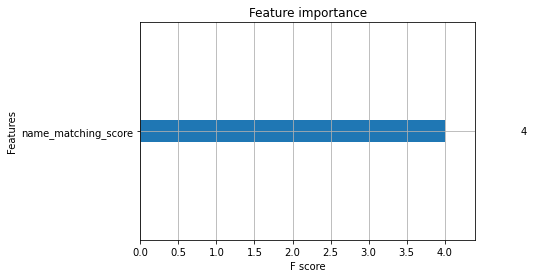

In [74]:
xgb.plot_importance(xg_reg)

## Randomforest feature importance

In [75]:
rfmodel.feature_importances_

array([0.24488059, 0.38243182, 0.2828532 , 0.08983439])

In [76]:
importance = rfmodel.feature_importances_

In [77]:
columns = X_train.columns

In [78]:
rfGraph = pd.Series(importance,columns)

Text(0.5, 0, 'Feature importance')

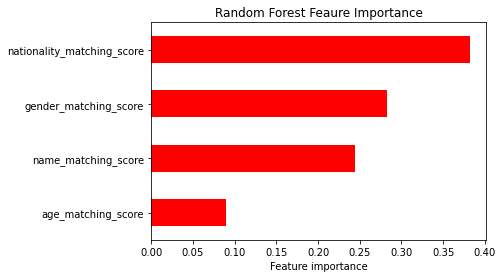

In [79]:
#figure(figsize(10,10))
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i])

rfGraph.sort_values().plot.barh(color = "red")
plt.title("Random Forest Feaure Importance")
plt.xlabel("Feature importance")
#addlabels(columns,importance)

In [80]:
rfGraph

name_matching_score           0.244881
nationality_matching_score    0.382432
gender_matching_score         0.282853
age_matching_score            0.089834
dtype: float64

In [81]:
df['confidence score'] = (df['name_matching_score'] * 0.907100/100 + df['nationality_matching_score'] *0.049973 + df['gender_matching_score'] * 0.030293 + df['age_matching_score']* 0.012634)



<ipython-input-81-0a0731bebd1b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['confidence score'] = (df['name_matching_score'] * 0.907100/100 + df['nationality_matching_score'] *0.049973 + df['gender_matching_score'] * 0.030293 + df['age_matching_score']* 0.012634)


In [82]:
df.head(10)

,name_matching_score,nationality_matching_score,gender_matching_score,age_matching_score,ground_confidence,confidence score
0,100,1.0,0.901961,0,1,0.984396
1,100,1.0,0.400000,0,1,0.969190
2,100,1.0,0.000000,0,1,0.957073
3,100,1.0,0.000000,0,1,0.957073
4,100,0.0,0.000000,0,1,0.907100
5,100,1.0,0.000000,0,0,0.957073
6,100,1.0,1.000000,1,1,1.000000
7,100,1.0,0.000000,1,1,0.969707
8,100,1.0,1.000000,1,1,1.000000
9,100,0.0,1.000000,1,1,0.950027


In [83]:
len(df[(df['confidence score'] > 0.95) & (df['ground_confidence'] ==0)])

2

In [84]:
# print(f"Model Accuracy is {accuracy*100}%")

In [85]:
df.head(10)

,name_matching_score,nationality_matching_score,gender_matching_score,age_matching_score,ground_confidence,confidence score
0,100,1.0,0.901961,0,1,0.984396
1,100,1.0,0.400000,0,1,0.969190
2,100,1.0,0.000000,0,1,0.957073
3,100,1.0,0.000000,0,1,0.957073
4,100,0.0,0.000000,0,1,0.907100
5,100,1.0,0.000000,0,0,0.957073
6,100,1.0,1.000000,1,1,1.000000
7,100,1.0,0.000000,1,1,0.969707
8,100,1.0,1.000000,1,1,1.000000
9,100,0.0,1.000000,1,1,0.950027


# Confusion Matrix for threshold : 0.9

Text(0.5, 257.44, 'Predicted label')

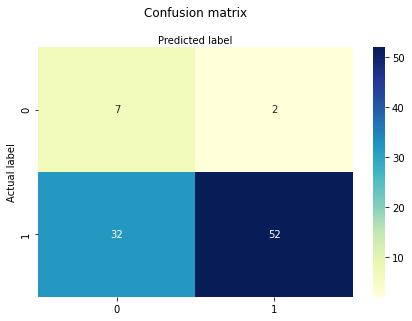

In [86]:
from sklearn import metrics

true_positive = len(df[(df['confidence score'] > 0.90) & (df['ground_confidence'] ==1)])
false_positive = len(df[(df['confidence score'] < 0.90) & (df['ground_confidence'] ==1)])
true_negative = len(df[(df['confidence score'] < 0.90) & (df['ground_confidence'] ==0)])
false_negative = len(df[(df['confidence score'] > 0.90) & (df['ground_confidence'] ==0)])

y_actual = df['ground_confidence']
y_pred = list(map(lambda x: 1 if x > 0.95 else 0, df['confidence score']))

cnf_matrix = metrics.confusion_matrix(y_actual, y_pred)
cnf_matrix

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# Confusion Matrix for threshold: 0.95

Text(0.5, 257.44, 'Predicted label')

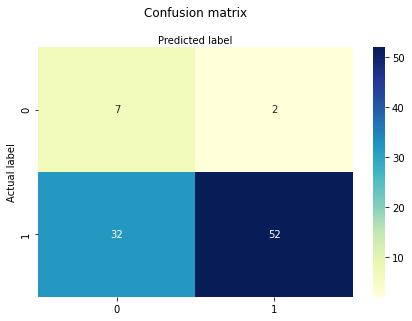

In [87]:
from sklearn import metrics

true_positive = len(df[(df['confidence score'] > 0.95) & (df['ground_confidence'] ==1)])
false_positive = len(df[(df['confidence score'] < 0.95) & (df['ground_confidence'] ==1)])
true_negative = len(df[(df['confidence score'] < 0.95) & (df['ground_confidence'] ==0)])
false_negative = len(df[(df['confidence score'] > 0.95) & (df['ground_confidence'] ==0)])

y_actual = df['ground_confidence']
y_pred = list(map(lambda x: 1 if x > 0.95 else 0, df['confidence score']))

cnf_matrix = metrics.confusion_matrix(y_actual, y_pred)
cnf_matrix

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [88]:
accuracy = (true_positive + true_negative +false_negative)/ len(df) 

In [89]:
print(f"Model Accuracy is {accuracy*100}%")

Model Accuracy is 65.59139784946237%


In [90]:
df[(df['confidence score'] > 0.95) & (df['ground_confidence'] ==0)]

,name_matching_score,nationality_matching_score,gender_matching_score,age_matching_score,ground_confidence,confidence score
5,100,1.0,0.0,0,0,0.957073
78,100,1.0,0.0,1,0,0.969707


## Threshold of 0.9 False Positive Rate

In [91]:
ninety = len(df[(df['confidence score'] > 0.90) & (df['ground_confidence'] ==0)]) * 100/len(df)

print(f"With a threshold of 0.9, false positive rate is {ninety}%")

With a threshold of 0.9, false positive rate is 8.602150537634408%


In [92]:
ninetyfive = len(df[(df['confidence score'] > 0.95) & (df['ground_confidence'] ==0)]) * 100/len(df)
print(f"With a threshold of 0.95, false positive rate is {ninetyfive}%")

With a threshold of 0.95, false positive rate is 2.150537634408602%


In [93]:
print(f"The difference in false positive rate is {ninety-ninetyfive}%")

The difference in false positive rate is 6.451612903225806%
